In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
AMZN=pd.read_csv('AMZN.csv')

In [ ]:
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [ ]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6257 non-null   object 
 1   Open       6257 non-null   float64
 2   High       6257 non-null   float64
 3   Low        6257 non-null   float64
 4   Close      6257 non-null   float64
 5   Adj Close  6257 non-null   float64
 6   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.3+ KB


In [ ]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6.257000e+03
mean,565.005651,571.345671,558.004657,564.817334,564.817334,7.270525e+06
std,918.112233,928.035683,906.961303,917.488221,917.488221,7.108549e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,39.009998,39.799999,38.360001,39.060001,39.060001,3.536500e+06
50%,105.930000,110.625000,101.500000,103.625000,103.625000,5.424200e+06
75%,596.140015,600.750000,588.299988,593.859985,593.859985,8.242900e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [ ]:
AMZN.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
AMZN.shape

(6257, 7)

In [ ]:
AMZN['Date']=pd.to_datetime(AMZN['Date'])
colors=['#FF9900','#000000']
sns.set(palette=colors,font='Serif',style='white',rc={'axes.facecolor':'whitesmoke','figure.facecolor':'whitesmoke'})



Text(0.5, 1.0, 'amazon stock value changes since 1997')

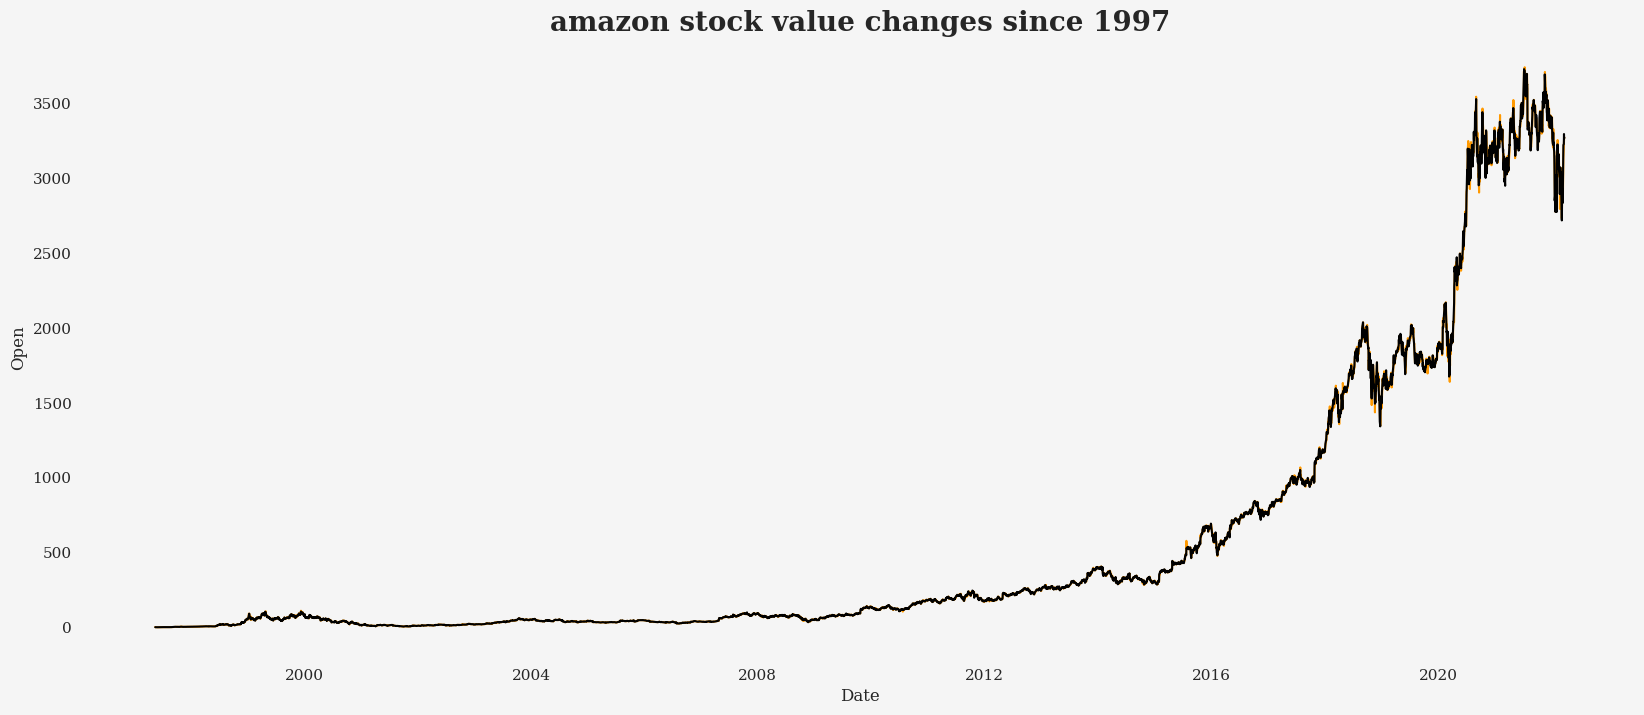

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=AMZN, x='Date',y='Open')
ax=sns.lineplot(data=AMZN, x='Date',y='Close',color=colors[1])
for i in ['left','right','top','bottom']:
  ax.spines[i].set_visible(False)
plt.title('amazon stock value changes since 1997',size=20, weight='bold')

Text(0.5, 1.0, 'amazon stock volume changes since 1997')

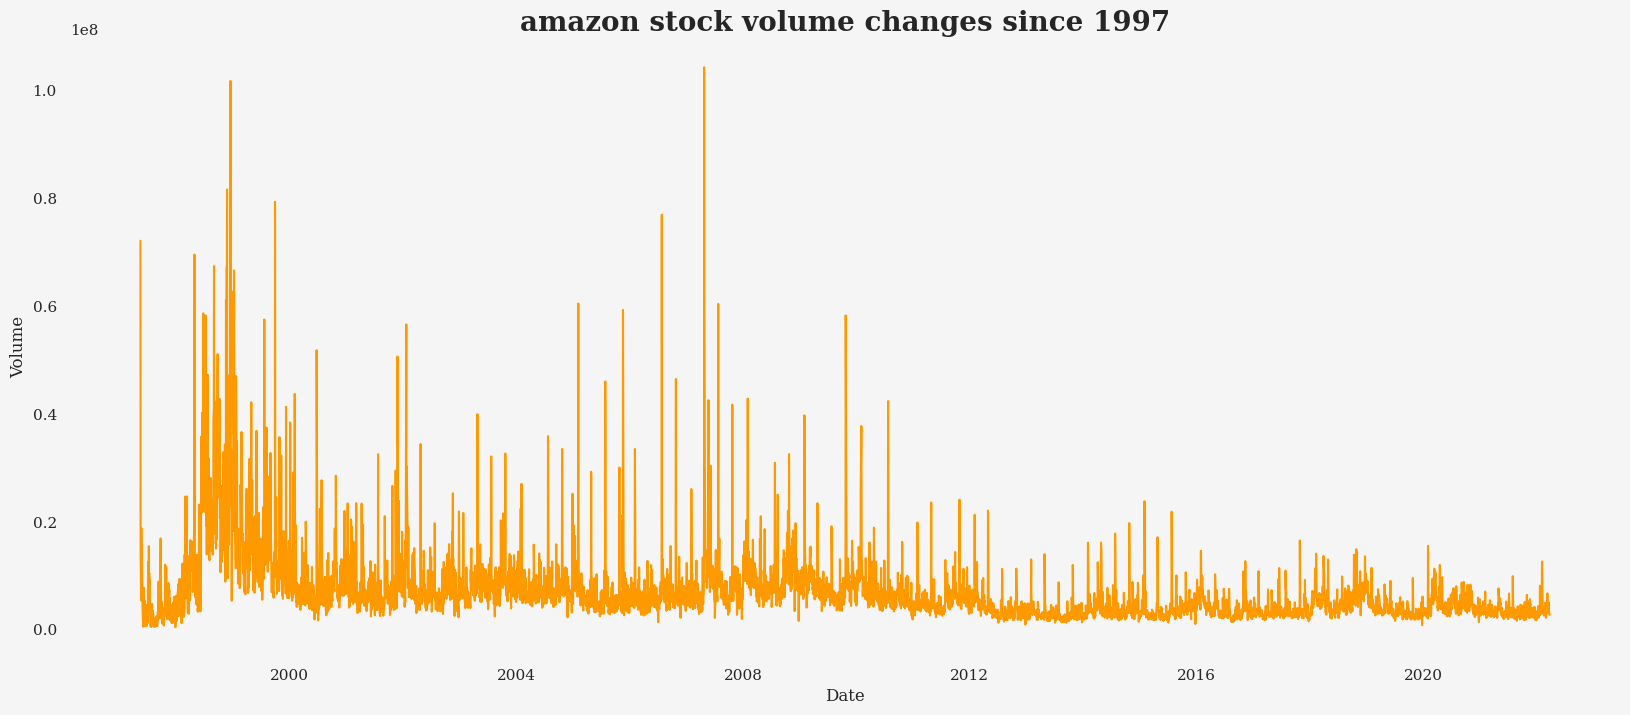

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=AMZN, x='Date',y='Volume')
for i in ['left','right','top','bottom']:
  ax.spines[i].set_visible(False)
plt.title('amazon stock volume changes since 1997',size=20, weight='bold')

<ipython-input-36-97fa7932eefb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(AMZN.corr(), annot=True)


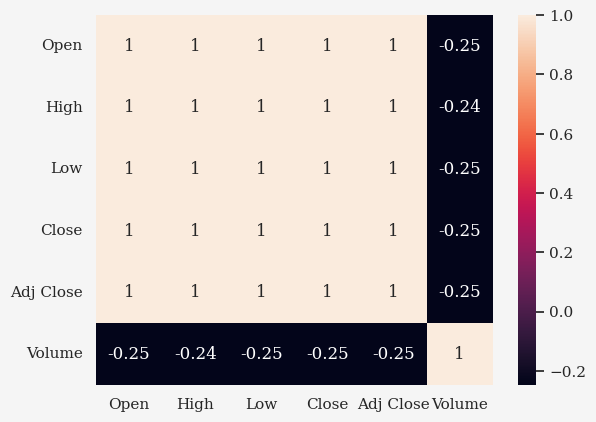

In [ ]:
ax = sns.heatmap(AMZN.corr(), annot=True)

features : Open,High,Low are highly correlated to the target feature Close i'll use one of them to avoid multicollinearity

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=AMZN[['Open','Volume']]
y=AMZN['Close'].values
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.reshape(-1,1))
x = pd.DataFrame(x, columns=['Open','Volume'])
y= pd.DataFrame(x, columns=['Open'])


xtrain,xtest ,ytrain ,ytest=train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
#xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
#xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))


In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model=Sequential()
model.add(LSTM(units=50,return_sequences = True, input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain, ytrain ,validation_data=(xtest,ytest),epochs=100, batch_size=32)

Epoch 1/100
157/157 [==============================] - 10s 17ms/step - loss: 0.0223 - val_loss: 4.5373e-04
Epoch 2/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 3.3522e-04
Epoch 3/100
157/157 [==============================] - 1s 10ms/step - loss: 0.0014 - val_loss: 2.6344e-04
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0011 - val_loss: 4.1209e-04
Epoch 5/100
157/157 [==============================] - 2s 10ms/step - loss: 0.0012 - val_loss: 7.1864e-04
Epoch 6/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0012 - val_loss: 2.1903e-04
Epoch 7/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 4.0282e-04
Epoch 8/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0011 - val_loss: 2.0836e-04
Epoch 9/100
157/157 [==============================] - 2s 10ms/step - loss: 8.9824e-04 - val_loss: 1.8516e-04
Epoch 10/100
157/157 [=======================

In [ ]:
from itertools import accumulate
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score,explained_variance_score

pred=model.predict(xtest)

mse=mean_squared_error(ytest,pred)

mae=mean_absolute_error(ytest,pred)

r2_sc=r2_score(ytest,pred)

evs=explained_variance_score(ytest,pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2_sc}")
print(f"Explained Variance Score: {evs}")


40/40 [==============================] - 2s 2ms/step
Mean Squared Error (MSE): 0.0003696313301858
Mean Absolute Error (MAE): 0.01210613770806434
R2 Score: 0.9936907279711853
Explained Variance Score: 0.9942591664469592


In [43]:


test=pd.DataFrame(columns=['test','pred'])
test['test']=ytest
test['pred']=pred.flatten()
test

,test,pred
1559,0.010844,0.014913
4578,0.140636,0.141419
2187,0.011394,0.014126
3386,0.044596,0.045196
5184,0.317358,0.319955
...,...,...
1345,0.004287,0.010709
3208,0.031704,0.034781
4250,0.085391,0.085686
1451,0.005406,0.009597
